Knee Point Threshold: 0.5031362585800877
Knee Point TPR: 0.48296593186372744
Knee Point FPR: 0.500998003992016


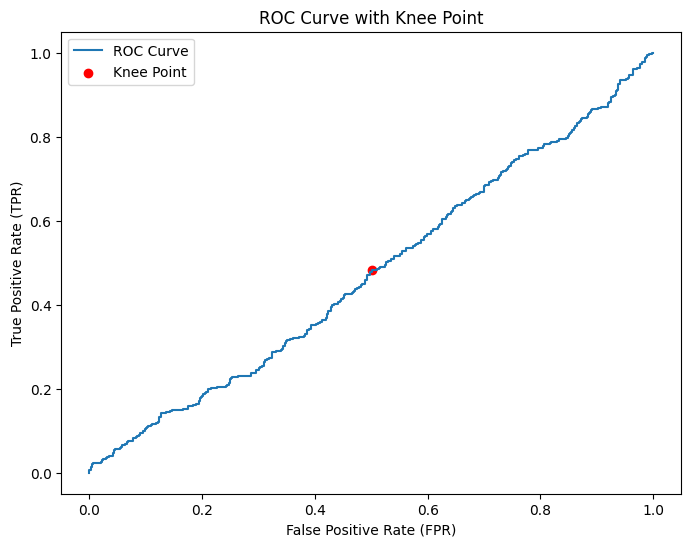

In [1]:
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Example predicted probabilities and true labels
np.random.seed(42)
pred_probs = np.random.rand(1000)
true_labels = np.random.randint(0, 2, 1000)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_probs)

# Calculate Euclidean distance from (0,1) for each point
distances = np.sqrt(fpr**2 + (1 - tpr)**2)

# Find the index of the knee point (minimum distance)
knee_index = np.argmin(distances)
knee_threshold = thresholds[knee_index]

print(f'Knee Point Threshold: {knee_threshold}')
print(f'Knee Point TPR: {tpr[knee_index]}')
print(f'Knee Point FPR: {fpr[knee_index]}')

# Plot ROC curve and knee point
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[knee_index], tpr[knee_index], color='red', label='Knee Point')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Knee Point')
plt.legend()
plt.show()


In [3]:
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score

# Assuming pred_probs are prediction probabilities and true_labels are the true labels
def find_best_threshold(pred_probs, true_labels):
    fpr, tpr, thresholds_roc = roc_curve(true_labels, pred_probs)
    precision, recall, thresholds_pr = precision_recall_curve(true_labels, pred_probs)
    
    # Youden's J statistic
    j_scores = tpr - fpr
    best_threshold_j = thresholds_roc[np.argmax(j_scores)]
    
    # F1 score
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_f1 = thresholds_pr[np.argmax(f1_scores)]
    
    # Knee point in ROC curve
    distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
    best_threshold_knee = thresholds_roc[np.argmin(distances)]
    
    return {
        "Best Threshold (Youden's J)": best_threshold_j,
        "Best Threshold (F1 Score)": best_threshold_f1,
        "Best Threshold (Knee Point)": best_threshold_knee
    }

# Example usage
pred_probs = np.random.rand(1000)  # Example prediction probabilities
true_labels = np.random.randint(0, 2, 1000)  # Example true labels

best_thresholds = find_best_threshold(pred_probs, true_labels)
print(best_thresholds)



{"Best Threshold (Youden's J)": 0.7889851599207933, 'Best Threshold (F1 Score)': 0.9983475113929496, 'Best Threshold (Knee Point)': 0.39931591580930814}


C:\Users\DELL\AppData\Local\Temp\ipykernel_3948\2401611949.py:14: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve

# Define costs
cost_fp = 10  # Cost of false positive
cost_fn = 100  # Cost of false negative

# Example prediction probabilities and true labels
np.random.seed(42)
pred_probs = np.random.rand(1000)  # Predicted probabilities from the classifier
true_labels = np.random.randint(0, 2, 1000)  # True labels

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_probs)

# Function to calculate total cost
def calculate_total_cost(threshold, pred_probs, true_labels, cost_fp, cost_fn):
    predicted_labels = (pred_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    return total_cost

# Find the optimal threshold
best_threshold = 0
min_cost = float('inf')

for threshold in thresholds:
    cost = calculate_total_cost(threshold, pred_probs, true_labels, cost_fp, cost_fn)
    if cost < min_cost:
        min_cost = cost
        best_threshold = threshold

print(f'Optimal Threshold: {best_threshold}')
print(f'Minimum Cost: {min_cost}')


Optimal Threshold: 0.005061583846218687
Minimum Cost: 5000
